**Problem Statement**

**Predict Loan Eligibility for Dream Housing Finance company**


Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the Train Dataset**

In [2]:
train=pd.read_csv("/content/sample_data/train_ctrUa4K.csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.shape

(614, 13)

In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Exploratory Data Analysis**

In [9]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
updated_train = train
updated_train[['LoanAmount','Loan_Amount_Term','Credit_History']]=updated_train[['LoanAmount','Loan_Amount_Term','Credit_History']].fillna(updated_train[['LoanAmount','Loan_Amount_Term','Credit_History']].mean())
updated_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
train[['Gender','Married','Dependents','Self_Employed']].mode()

,Gender,Married,Dependents,Self_Employed
0,Male,Yes,0,No


In [14]:
train['Gender']=train['Gender'].fillna('Male')
train['Married']=train['Married'].fillna('Yes')
train['Dependents']=train['Dependents'].fillna(0)
train['Self_Employed']=train['Self_Employed'].fillna('No')

In [15]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
train.corr()

<ipython-input-16-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000


**Importing Test Dataset**

In [17]:
test = pd.read_csv('/content/sample_data/test_lAUu6dG.csv')

In [18]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [19]:
test.shape

(367, 12)

In [20]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [22]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [23]:
test[['Gender','Dependents','Self_Employed']].mode()

,Gender,Dependents,Self_Employed
0,Male,0,No


In [24]:
test['Gender']=test['Gender'].fillna('Male')
test['Dependents']=test['Dependents'].fillna(0)
test['Self_Employed']=test['Self_Employed'].fillna('No')

In [25]:
updated_test = test
updated_test[['LoanAmount','Loan_Amount_Term','Credit_History']]=updated_test[['LoanAmount','Loan_Amount_Term','Credit_History']].fillna(updated_test[['LoanAmount','Loan_Amount_Term','Credit_History']].mean())
updated_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [26]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [27]:
train_original=train.copy()
test_original=test.copy()

**Data Visualization**

**Univaraite Analysis**

<Axes: xlabel='Self_Employed', ylabel='count'>

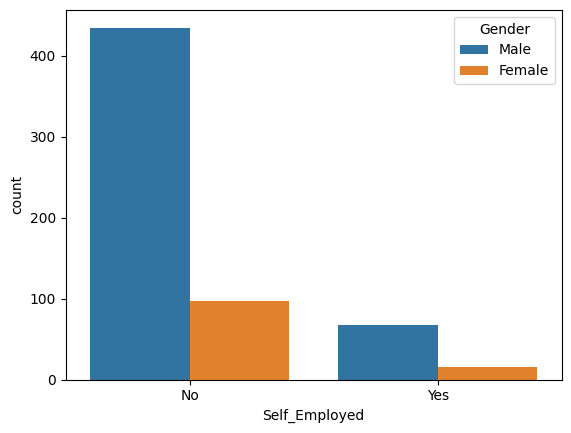

In [28]:
sns.countplot(x='Self_Employed',hue='Gender',data=train)

**Bivariate Analysis**

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

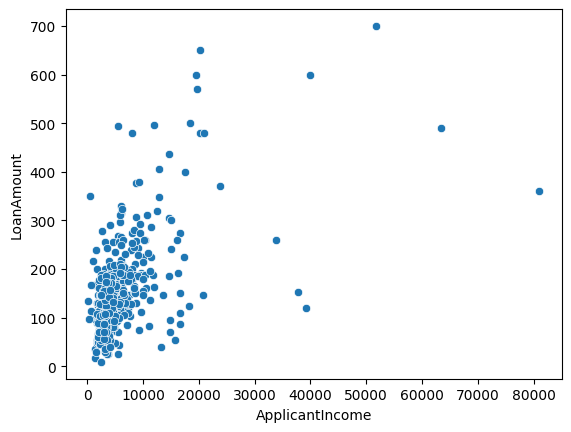

In [29]:
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=train)

<Axes: xlabel='CoapplicantIncome', ylabel='LoanAmount'>

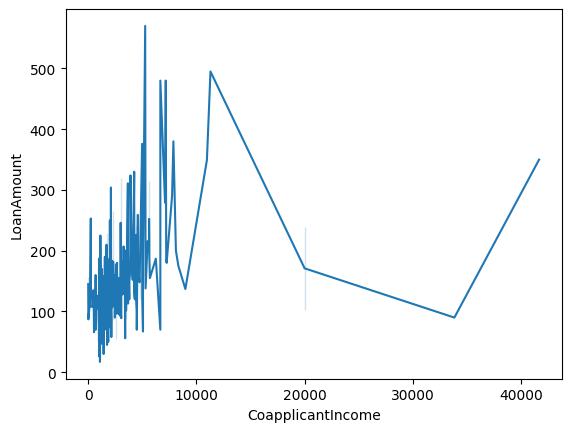

In [30]:
sns.lineplot(x='CoapplicantIncome',y='LoanAmount',data=train)

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

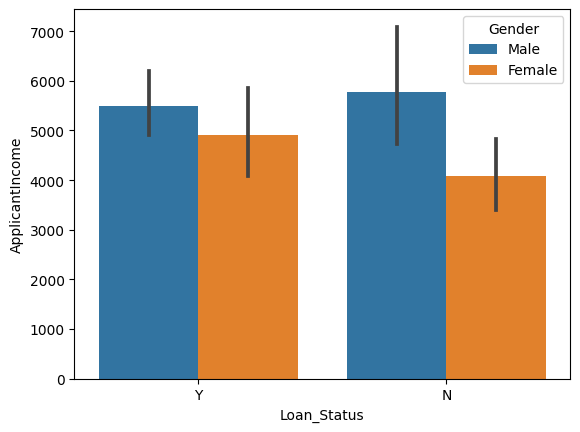

In [31]:
sns.barplot(x='Loan_Status',y='ApplicantIncome',hue='Gender',data=train)

**Multivariate Analysis**


<ipython-input-32-fa0c65b599b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=train.corr(),annot=True)


<Axes: >

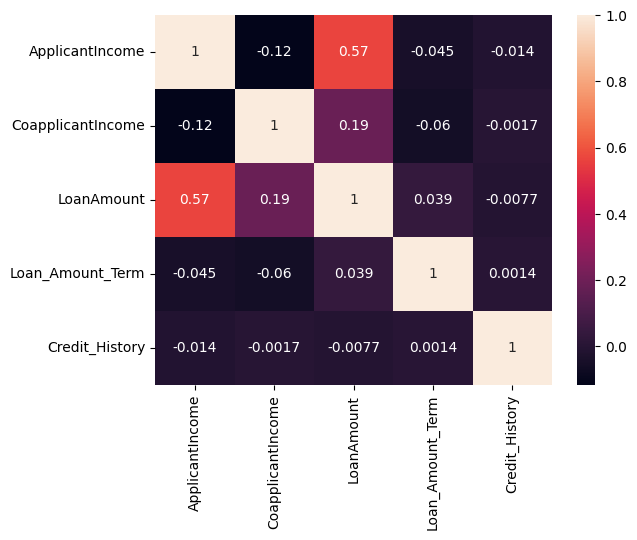

In [32]:
sns.heatmap(data=train.corr(),annot=True)

**Modelling**

In [33]:
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

In [34]:
train.shape

(614, 12)

In [35]:
test.shape

(367, 11)

Creating dummy Varaibles

In [36]:
#Dummy Variables: we will convert the categorical variables into numerical values using dummies
train = pd.get_dummies(train, columns =['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])
print(train.dtypes)
test = pd.get_dummies(test, columns =['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])
print(test.dtypes)

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                 object
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Dependents_0                 uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object
ApplicantIncome              int64
CoapplicantIncome            int64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender_Female                uint8
Gender

Splitting the Dataset into X and y

In [37]:
X=train.drop('Loan_Status',axis=1)
y=train['Loan_Status']

In [38]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,1,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.000000,180.0,1.0,0,1,0,1,0,...,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.000000,360.0,1.0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,0,1


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [40]:
print(X_train.shape,y_train.shape)

(411, 21) (411,)


In [41]:
print(X_test.shape,y_test.shape)

(203, 21) (203,)


**Logisticregression**

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [43]:
y_test

114    Y
144    Y
226    N
491    Y
382    Y
      ..
251    N
279    Y
531    Y
176    Y
200    Y
Name: Loan_Status, Length: 203, dtype: object

In [44]:
y_test.shape

(203,)

In [45]:
y_pred

array(['Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [46]:
y_pred.shape

(203,)

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lg = accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7684729064039408
[[ 20  41]
 [  6 136]]
              precision    recall  f1-score   support

           N       0.77      0.33      0.46        61
           Y       0.77      0.96      0.85       142

    accuracy                           0.77       203
   macro avg       0.77      0.64      0.66       203
weighted avg       0.77      0.77      0.73       203



In [48]:
test_pred = model.predict(test)

In [49]:
test_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

**KNN**

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [51]:
knn=accuracy_score(y_test,knn_pred)
print(accuracy_score(knn_pred,y_test))
print(confusion_matrix(knn_pred,y_test))
print(classification_report(knn_pred,y_test))

0.625615763546798
[[ 10  25]
 [ 51 117]]
              precision    recall  f1-score   support

           N       0.16      0.29      0.21        35
           Y       0.82      0.70      0.75       168

    accuracy                           0.63       203
   macro avg       0.49      0.49      0.48       203
weighted avg       0.71      0.63      0.66       203



**SVC**

In [52]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)

In [53]:
svc=accuracy_score(svc_pred,y_test)
print(accuracy_score(svc_pred,y_test))
print(confusion_matrix(svc_pred,y_test))
print(classification_report(svc_pred,y_test,zero_division=0))

0.6995073891625616
[[  0   0]
 [ 61 142]]
              precision    recall  f1-score   support

           N       0.00      0.00      0.00         0
           Y       1.00      0.70      0.82       203

    accuracy                           0.70       203
   macro avg       0.50      0.35      0.41       203
weighted avg       1.00      0.70      0.82       203



**Kfold cross validation**

In [54]:
from sklearn.model_selection import KFold
kfold_validator = KFold(10)
for train_index,test_index in kfold_validator.split(X,y):
    print('trainig index:',train_index)
    print('test index:',test_index)

trainig index: [ 62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 304

In [55]:
from sklearn.model_selection import cross_val_score
cv_result = cross_val_score(model,X,y,cv=kfold_validator)
cv_result

array([0.77419355, 0.83870968, 0.74193548, 0.77419355, 0.7704918 ,
       0.80327869, 0.86885246, 0.83606557, 0.7704918 , 0.83606557])

In [56]:
kf = np.mean(cv_result)
kf

0.801427815970386

**Stratified kfold cross validation**

In [57]:
from sklearn.model_selection import StratifiedKFold
skfold_validator = StratifiedKFold(n_splits=10)

In [58]:
for train_index,test_index in skfold_validator.split(X,y):
    print('trainig index:',train_index)
    print('test index:',test_index)

trainig index: [ 53  54  57  62  63  64  65  66  69  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 304

In [59]:
from sklearn.model_selection import cross_val_score
cv_result = cross_val_score(model,X,y,cv=skfold_validator)

In [60]:
skf = np.mean(cv_result)
skf

0.8030671602326811

**Decisiontreeclassifier**


In [61]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = "entropy",max_depth=3)
clf = clf.fit(X_train,y_train)
clf_pred = clf.predict(X_test)

In [62]:
dtc=accuracy_score(clf_pred,y_test)
print(accuracy_score(clf_pred,y_test))
print(confusion_matrix(clf_pred,y_test))
print(classification_report(clf_pred,y_test))

0.7783251231527094
[[ 20   4]
 [ 41 138]]
              precision    recall  f1-score   support

           N       0.33      0.83      0.47        24
           Y       0.97      0.77      0.86       179

    accuracy                           0.78       203
   macro avg       0.65      0.80      0.67       203
weighted avg       0.90      0.78      0.81       203



**Randomforest**

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [64]:
rfc=accuracy_score(rfc_pred,y_test)
print(accuracy_score(rfc_pred,y_test))
print(confusion_matrix(rfc_pred,y_test))
print(classification_report(rfc_pred,y_test))

0.7487684729064039
[[ 22  12]
 [ 39 130]]
              precision    recall  f1-score   support

           N       0.36      0.65      0.46        34
           Y       0.92      0.77      0.84       169

    accuracy                           0.75       203
   macro avg       0.64      0.71      0.65       203
weighted avg       0.82      0.75      0.77       203



**Hyperparamter Tuning**

**Gridsearch**

In [65]:
parameters ={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
              'criterion' : ['gini', 'entropy'],
              'n_estimators': [50,100,200,400,600]}

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
grid_search = GridSearchCV(RandomForestClassifier(),
                            parameters,
                            cv=5,
                            scoring='accuracy',n_jobs=-1)

In [68]:
grid_result= grid_search.fit(X_train, y_train)

In [69]:
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)
grid = grid_result.best_score_

Best Params:  {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 600}
Best Score:  0.8151630913899499


**Randomizedsearch**

In [70]:
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(estimator = RandomForestClassifier(),
                                 param_distributions=parameters,verbose=1, n_jobs=-1,
                                  n_iter=50)

In [71]:
grid_result= random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [72]:
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)
rgrid = grid_result.best_score_

Best Params:  {'n_estimators': 400, 'max_depth': 100, 'criterion': 'entropy'}
Best Score:  0.8151043197178959


In [73]:
print('Accuracy Score')
print('Logistic_Regression:',lg)
print('KNN:',knn)
print('svc:',svc)
print("kfold:",kf)
print("Stratified_kfold:",skf)
print("dtc:",dtc)
print("rfc:",rfc)
print("grid:",grid)
print("randomized_grid:",rgrid)

Accuracy Score
Logistic_Regression: 0.7684729064039408
KNN: 0.625615763546798
svc: 0.6995073891625616
kfold: 0.801427815970386
Stratified_kfold: 0.8030671602326811
dtc: 0.7783251231527094
rfc: 0.7487684729064039
grid: 0.8151630913899499
randomized_grid: 0.8151043197178959


Here we can see that grid search has high accuracy score compared to other models.

We can use gridsearchcv algorithm to predict test data.

In [74]:
submission=pd.read_csv("/content/sample_data/sample_submission_49d68Cx.csv")

In [77]:
test_pred = grid_search.predict(test)

In [78]:
test_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [79]:
submission['Loan_Status'] = test_pred

In [80]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('loan_predictions.csv')